## Problem Statement:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

In [1]:
import numpy as np  
import pandas as pd 
import string    # special operations on strings
import spacy   #language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
from textblob import TextBlob
%matplotlib inline

In [2]:
df = pd.read_csv('amazon.csv')
df

,Unnamed: 0,Customer Name,Rate,Review Title,Reviews
0,0,Gautam Anand,1.0 out of 5 stars,Not durable at all!!!,It has great sound quality and bass but afte...
1,1,abhishek,2.0 out of 5 stars,Boat makes the best value Products that only l...,"[BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE,..."
2,2,Jinnish Dalal,5.0 out of 5 stars,PLUG INTO NIRVANA,This is a premium quality product from boAt-...
3,3,Gizmofreak Reviews,1.0 out of 5 stars,Simply Awful,The boAt Rockerz line is boAt's super cheap ...
4,4,Helloworld,5.0 out of 5 stars,Premium look and super comfy,These are super comfortable and premium look...
5,5,parmar,5.0 out of 5 stars,Poor material..and good service...,Material is very poor quality but service al...
6,6,Danny,1.0 out of 5 stars,Tenuously fragile and worthless,Never have I seen as fragile headphone as th...
7,7,Murali,1.0 out of 5 stars,Poor build quality,Poor build quality. One side of the headphon...
8,8,Vikas Mehta,3.0 out of 5 stars,Decent headphones with some evident drawbacks,At 1999 they are decent.Pros1. Light weight ...
9,9,S.Akshansh,3.0 out of 5 stars,Not durable.,I bought this 3 months back and it's broken ...


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,Customer Name,Rate,Review Title,Reviews
0,Gautam Anand,1.0 out of 5 stars,Not durable at all!!!,It has great sound quality and bass but afte...
1,abhishek,2.0 out of 5 stars,Boat makes the best value Products that only l...,"[BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE,..."
2,Jinnish Dalal,5.0 out of 5 stars,PLUG INTO NIRVANA,This is a premium quality product from boAt-...
3,Gizmofreak Reviews,1.0 out of 5 stars,Simply Awful,The boAt Rockerz line is boAt's super cheap ...
4,Helloworld,5.0 out of 5 stars,Premium look and super comfy,These are super comfortable and premium look...
5,parmar,5.0 out of 5 stars,Poor material..and good service...,Material is very poor quality but service al...
6,Danny,1.0 out of 5 stars,Tenuously fragile and worthless,Never have I seen as fragile headphone as th...
7,Murali,1.0 out of 5 stars,Poor build quality,Poor build quality. One side of the headphon...
8,Vikas Mehta,3.0 out of 5 stars,Decent headphones with some evident drawbacks,At 1999 they are decent.Pros1. Light weight ...
9,S.Akshansh,3.0 out of 5 stars,Not durable.,I bought this 3 months back and it's broken ...


In [5]:
data = df['Reviews']

In [6]:
data=pd.DataFrame(data)

In [7]:
data

,Reviews
0,It has great sound quality and bass but afte...
1,"[BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE,..."
2,This is a premium quality product from boAt-...
3,The boAt Rockerz line is boAt's super cheap ...
4,These are super comfortable and premium look...
5,Material is very poor quality but service al...
6,Never have I seen as fragile headphone as th...
7,Poor build quality. One side of the headphon...
8,At 1999 they are decent.Pros1. Light weight ...
9,I bought this 3 months back and it's broken ...


In [8]:
data = [Reviews.strip() for Reviews in data.Reviews]  
data = [Reviews for Reviews in data if Reviews]   
data[0:10]

['It has great sound quality and bass but after (2 months) of use they got break without any falling or jerk. I was wearing it normally and it got break from one side.I call to costumer care service no. but no reply is coming, I also filed a complaint in Boat official website for warranty claim but no respond is coming from there too. And there is no service center where I can approach for my claim.So my ₹1499 are wasted now...',
 "[BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE, I WAS WEARING IT NORMALLY AND IT SPLIT OPEN ON ONE SIDE.The extenders are weak. ( Pic inscuded) My boat 400s broke at the centre too. They need to concentrate less on celebrity endorsements and use the profits on materials and quality control. They still worked so I taped it up with a metal sheet. Still will give 2 stars for the sound.[ORIGINAL REVIEW]I've owned boat products such as the Rockerz 400 and some of their earphones and this is the best experience I've had with the product.Review after 1 day of use and 

In [9]:
# Joining the list into one string/text
text='  '.join(data)
text

"It has great sound quality and bass but after (2 months) of use they got break without any falling or jerk. I was wearing it normally and it got break from one side.I call to costumer care service no. but no reply is coming, I also filed a complaint in Boat official website for warranty claim but no respond is coming from there too. And there is no service center where I can approach for my claim.So my ₹1499 are wasted now...  [BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE, I WAS WEARING IT NORMALLY AND IT SPLIT OPEN ON ONE SIDE.The extenders are weak. ( Pic inscuded) My boat 400s broke at the centre too. They need to concentrate less on celebrity endorsements and use the profits on materials and quality control. They still worked so I taped it up with a metal sheet. Still will give 2 stars for the sound.[ORIGINAL REVIEW]I've owned boat products such as the Rockerz 400 and some of their earphones and this is the best experience I've had with the product.Review after 1 day of use and will

In [10]:
# POS Tagging
nlp = spacy.load('en_core_web_md')
one_block = text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

### Emotion Mining

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['It has great sound quality and bass but after (2 months) of use they got break without any falling or jerk.',
 'I was wearing it normally and it got break from one side.I call to costumer care service no.',
 'but no reply is coming, I also filed a complaint in Boat official website for warranty claim but no respond is coming from there too.',
 'And there is no service center where I can approach for my claim.So my ₹1499 are wasted now... [BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE, I WAS WEARING IT NORMALLY AND IT SPLIT OPEN ON ONE SIDE.The extenders are weak.',
 '( Pic inscuded) My boat 400s broke at the centre too.',
 'They need to concentrate less on celebrity endorsements and use the profits on materials and quality control.',
 'They still worked so I taped it up with a metal sheet.',
 'Still will give 2 stars for the sound.',
 "[ORIGINAL REVIEW]I've owned boat products such as the Rockerz 400 and some of their earphones and this is the best experience I've had with the product.R

In [13]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It has great sound quality and bass but after ...
1,I was wearing it normally and it got break fro...
2,"but no reply is coming, I also filed a complai..."
3,And there is no service center where I can app...
4,( Pic inscuded) My boat 400s broke at the cent...
...,...
93,Ears pain after this much usage.4.
94,No case or pouch but was not expecting eaither...
95,The product says we have 1-year warranty but p...
96,Bad experience.


In [14]:
afinn = pd.read_csv('C:\\Users\\User\\Documents\\ExcelR\\Datasets\\Afinn.csv')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [16]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [17]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
# test that it works
calculate_sentiment(text = 'ability')

2

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [20]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    21
1    18
2    25
3    41
4    11
5    17
6    12
7     8
8    37
9     7
Name: word_count, dtype: int64

In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
28,All over it is an awesome product.,4,7
34,It isn't any significant improvement over your...,4,20
24,The amazing battery life and the reduced charg...,4,14
64,"Save up some money, work at McDonalds, and tr...",5,14
82,"I am happy at 40% volume, so they are super lo...",6,11
31,It might be worth buying your grandma as a gif...,6,22
84,Call quality is good for this price.6 connect ...,6,15
14,"Base is not amazing, let's just say it's above...",8,22
66,The only good thing about these cans is the ba...,9,34
67,Beautifully designed with very good matt finis...,11,15


In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    98.000000
mean      0.428571
std       2.773215
min      -6.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max      11.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,It has great sound quality and bass but after ...,0,21
2,"but no reply is coming, I also filed a complai...",-2,25
3,And there is no service center where I can app...,-3,41
4,( Pic inscuded) My boat 400s broke at the cent...,0,11
6,They still worked so I taped it up with a meta...,0,12


In [24]:
sent_df[sent_df['sentiment_value']<-2]

,sentence,sentiment_value,word_count
3,And there is no service center where I can app...,-3,41
11,"Range is next level, didn't experience any los...",-3,21
32,Sound Quality - awful.,-3,4
33,"Honestly, the boAt Rockerz 450 does little mor...",-3,17
41,"The audio sounds horrible, and your ears will ...",-6,18
44,"The cans are very small, even for on-ear headp...",-3,21
46,Build Quality - In a word - bad.,-3,8
56,You won't even be able to use the mic for how ...,-3,14
72,I have been delivered a product with manufactu...,-6,13
95,The product says we have 1-year warranty but p...,-3,11


In [25]:
sent_df[sent_df['sentiment_value']<-2].head()['sentence'].tolist()[0]

'And there is no service center where I can approach for my claim.So my ₹1499 are wasted now... [BIG UPDATE] IT BROKE ALONG THE RIGHT HINGE, I WAS WEARING IT NORMALLY AND IT SPLIT OPEN ON ONE SIDE.The extenders are weak.'

In [26]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,It has great sound quality and bass but after ...,0,21,0
1,I was wearing it normally and it got break fro...,1,18,1
2,"but no reply is coming, I also filed a complai...",-2,25,2
3,And there is no service center where I can app...,-3,41,3
4,( Pic inscuded) My boat 400s broke at the cent...,0,11,4
...,...,...,...,...
93,Ears pain after this much usage.4.,-2,6,93
94,No case or pouch but was not expecting eaither...,-2,73,94
95,The product says we have 1-year warranty but p...,-3,11,95
96,Bad experience.,-3,2,96


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

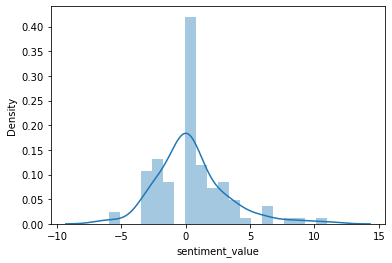

In [27]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

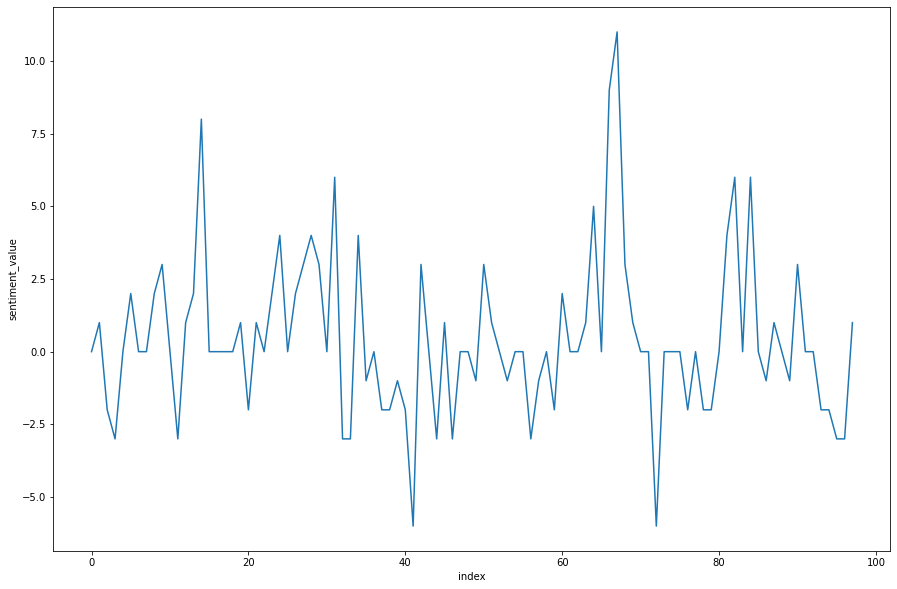

In [28]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

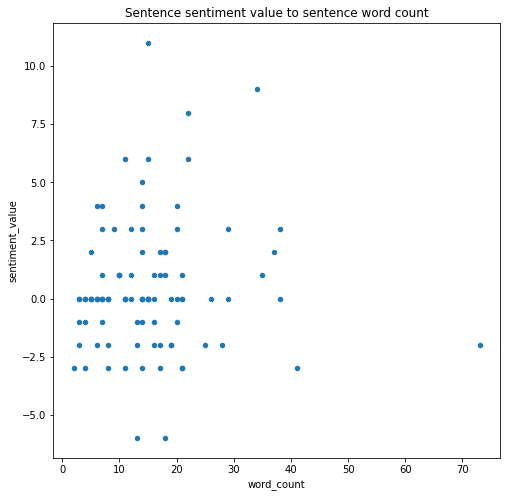

In [29]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

### Thus we can say that most of the reviews are neutral. Positive reviews are more compared to negative reviews. Hence we can conclude that it is a good product.